# Glassdoor Salary Prediction Project

As our very first data science project, we have decided to dedicate it to the anticipation of our future in the data science field. In this project, we will be evaluating data science job opportunities in the United States; specifically, we will be prediciting the salaries of different positions depending on several factors. In this way, we could best prepare ourselves for the job opportunities to come (yes, we are optimistic people); in the sense that we will find out which factors play the most important roles and what salaries we should expect, and perhaps we will find more surprises along the way. 

# Procedure:

1. Cleaning the Data & Feature Engineering 
2. Visualizing/Getting to Know Our Data
3. Testing Different Models 
4. Fine-Tuning to Create the Best Model
5. Finally: Testing our Best Model


# Cleaning the Data & Feature Engineering

In [72]:
# First, let's import the necessary tools to proceed and load our datatset

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('dataset_glassdoor-jobs-scraper_2022-02-04.csv')

In [18]:
# Let's take a look at our data, shall we?

df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\r\n\r\nTitle: Data Engineer\r\n\r\n...,4.8,IGNW\r\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


Our objective for this project is to predict the salary of a job offer depending on its features. Therefore, our first task is to take care of the salary: we will remove any instances that do not display a salary, and we will create a separate column 
for the average of the salary renage provided in the "Salary Estimate" column; in this way, we can have a numerical column that we can actually predict the values of.

Additionally, we have noticed that some of the salaries are hourly while others are annually, and therefore, we will feature engineer a new column, "Salary_Per_Hour", that takes account of which salaries are annual and which salaries are hourly, as this may affect the salaries.

In [19]:
#making a column for whether a salary is per hour or annual

df['Salary_Per_Hour'] = df['Salary Estimate'].apply(lambda x: 'hourly' if 'per hour' in x.lower() else 'annually')

#removing all rows without salary

df = df[df['Salary Estimate'] != '-1']

#let's see how many instances we have left:

df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary_Per_Hour
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,annually
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,annually
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,annually
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",annually
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK\r\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",annually
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",annually
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,annually
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,annually


Now, to get the exact average of the range of salaries provided, we will create two new columns, "Min_Salary" and "Max_Salary", to calculate it.

And then, we will create a new column, "Avg Salary", which will be the average of these two columns.

In [20]:
# our first objective is to remove any non-numerical character from the column and to save it under variable "salary"

salary=df['Salary Estimate']

without_kd=salary.apply(lambda x:x.lower().replace('k',' ').replace('$',' ').replace('(glassdoor est.)',' ').replace(' (employer est.)',' ').replace('employer provided salary:','').replace('per hour',''))

# making a min salary column and changing type to int

df['Min_Salary'] = without_kd.apply(lambda x: int(x.split('-')[0]))
df['Min_Salary'] =df.apply(lambda x:x['Min_Salary']*2500/1000 if x['Salary_Per_Hour']=='hourly' else x['Min_Salary'],axis=1)

#making a max salary column and changing type to int

df['Max_Salary']=without_kd.apply(lambda x:x.split('-')[1])
df['Max_Salary']=df['Max_Salary'].astype('int')
df['Max_Salary'] =df.apply(lambda x:x['Max_Salary']*2500/1000 if x['Salary_Per_Hour']=='hourly' else x['Max_Salary'],axis=1)


#making an average salary column

df['Avg Salary']=(df.Min_Salary+df.Max_Salary)/2

#let's take a loop!

df[['Salary_Per_Hour','Min_Salary','Max_Salary','Avg Salary']]


,Salary_Per_Hour,Min_Salary,Max_Salary,Avg Salary
0,annually,53.0,91.0,72.0
1,annually,63.0,112.0,87.5
2,annually,80.0,90.0,85.0
3,annually,56.0,97.0,76.5
4,annually,86.0,143.0,114.5
...,...,...,...,...
950,annually,58.0,111.0,84.5
951,annually,72.0,133.0,102.5
952,annually,56.0,91.0,73.5
953,annually,95.0,160.0,127.5


Next, we looked into some other columns that needed some cleaning. 

The first ones we looked at were Rating and Company, as we've noticed the Company company includes the rating in the name when the rating was included, so we decided to remove it for aesthetic's sake.

And then we proceeded to clean up the Rating column, noticing that there are a lot of missing values. We decided to fill those values with the average rating 

In [21]:
# remove rating from Company Name

df['Rating']=df['Rating'].astype('float')
df['Company Name']=df.apply(lambda x:x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-4],axis=1)

# grabbing all non-missing values of ratings

ratingNoMinus=df[df['Rating']>0]
ratingNoMinus=ratingNoMinus['Rating']

# getting the average of the ratings

ratingNoMinusAvg=(ratingNoMinus.sum()/len(ratingNoMinus))
ratingNoMinusAvg=((ratingNoMinusAvg*10).astype('int')/10)

# filling all missing rating values with average rating

df['Rating']=df['Rating'].apply(lambda x:ratingNoMinusAvg if x<0 else x)

Next, we'll be moving onto the "Location" column. We decided that the exact city of a job offer is too broad for our objective, and therefore, we have decided to feature engineer a new column, "State", which as the name implies provides the state of the job posting.

In addition to that, we feature engineered another column, "Is_Headquarters", which checks if a job posting's location is the same as its headquarters, because that may have an effect on the salary.

In [22]:
# create a column for State, so we can simplify the location

df['State'] = df.apply(lambda x: 'Remote' if x['Location'].find(',') == -1  else x['Location'].split(',')[1],axis=1)


# create a column that checks if a job offer is in headquarters or not

df['Is_Headquarters']=df.apply(lambda x:0 if x['Headquarters']=='-1' else x['Headquarters'],axis=1)
df['Is_Headquarters']=df.apply(lambda x:0 if x['Location']!=x['Is_Headquarters'] else 1 ,axis=1)

Next, we'll be moving onto the "Founded" column. The important information that we derive from this column is how long a company has been around; the year is not the significant portion, but rather the age. Therefore, we will feature engineer a new column, "Age of Company", that will give us the relevant information.

As we've noticed there have been quite a bit of missing values in this column, we've decided to fill those values with the median age for these companies. We chose the median and not the average because we have a few outliers (we have a few very old companies, while the majority of companies are not very old)

In [23]:
# create age of company column

df['Age of Company'] = df.Founded.apply(lambda x: x if x<0 else 2022-x)

# getting all non-missing values of age of company

ageN=df[df['Age of Company']!=-1]

# getting the median value of age of company

ageN['Age of Company'].median()

# filling all missing values with the median (which we found is 30)

df['Age of Company']=df['Age of Company'].apply(lambda x:x if x!=-1 else 30 )

Next, we will be working with the "Description" column. On its own, each description is too specific to be useful to us; but we can extract some important information from the "Description" column.

We read through some of the descriptions to get a feel for what might be relevant. We've noticed that some descriptions mention certain tools that are relevant for the job posting, the frequent ones being: Python, Spark, AWS, and Excel. Therefore, we created a column for each of these tools to see in which ways they may affect the salary of the jobs (the columns check whether or not that tool is mentioned in the description; the columns use boolean values 1 and 0), as they can imply different roles/skillsets for a job. 

Another feature engineering we've done with this column is creating another column, 'Description Length' for the length of each description (number of words) to see how that may affect the salary.

In [24]:
# create new columns relating to job description 

# a column if Python is involved in job
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# a column if Spark is involved in job
df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# a column if AWS is involved in job
df['AWS'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# a column if Excel is involved in job
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

# create a new column for how many words are used per description

df['Description_Length']=df['Job Description'].apply(lambda x: len(x.split(' ')))

df[['Python','Spark','AWS','Excel','Description_Length']]

,Python,Spark,AWS,Excel,Description_Length
0,1,0,0,1,337
1,1,0,0,0,636
2,1,1,0,1,460
3,1,0,0,0,489
4,1,0,0,1,358
...,...,...,...,...,...
950,0,0,1,0,829
951,1,1,1,0,845
952,0,0,0,1,399
953,0,0,0,1,203


Next, we looked at yet another interesting and inciteful column, 'Job Title', and engineered this feature to extract more useful information to us. 

We engineered a new feature, 'Job Categories', which takes all of the job titles and categorizes them into distinct categories that are easier to work with. Since the creation of this new column is a bit more complex, we decided to create a function for it instead of using a short lambda function.

Another new feature we engineered is 'Seniority', as we've noticed that some Job Titles mention a Senior or Junior position, and that may have an effect on the salary. We created a function for that, too.

In [25]:
# simplify job titles into distinct categories with 'job categories column'

# function that divides each job title into a category

def job_categories(position):
    if 'data scientist' in position.lower():
        return 'Data Scientist'
    elif 'analyst' in position.lower() or 'analysis' in position.lower() or 'statistic' in position.lower():
        return 'Data Analyst'
    elif 'data engineer' in position.lower():
        return 'Data Engineer'
    elif 'software engineer' in position.lower():
        return 'Software Engineer'
    elif 'machine learning' in position.lower() or 'ml' in position.lower():
        return "Machine Learning Engineer"
    
    elif 'engineer' in position.lower():
        return 'Other Engineer'

    elif 'director' in position.lower():
        return 'Director'
    elif 'manager' in position.lower():
        return 'Manager'
    else:
        return 'Other'

# creating the job categories column

df['Job Categories'] = df['Job Title'].apply(job_categories)

df['Job Categories'].value_counts()

Data Scientist               279
Other                        152
Data Engineer                118
Data Analyst                 112
Machine Learning Engineer     24
Manager                       22
Other Engineer                17
Director                      14
Software Engineer              4
Name: Job Categories, dtype: int64

In [26]:
# function that divides each job title into its seniority status

def seniority(position):
    if 'senior' in position.lower() or 'sr' in position.lower() or 'lead' in position.lower() or 'principal' in position.lower():
        return "Senior"
    elif 'junior' in position.lower() or 'jr' in position.lower():
        return "Junior"
    else:
        return 'none'

# creating the seniority column
    
df['Seniority'] = df['Job Title'].apply(seniority)

df['Seniority'].value_counts()

none      519
Senior    220
Junior      3
Name: Seniority, dtype: int64

Next, we looked into the 'Competitors' column. We found this to be yet another column that could be helpful, but not on its own. We decided to feature engineer a new column, 'Competitor Count', that will give us how many competitors a company has, so we can use the numerical value of this feature and see if it has an affect on the salary. As there are frequently occuring missing values in this column, we decided to treat a missing value as though the company does not have any competitors.

In [27]:
df['Competitor Count']=df['Competitors'].apply(lambda x:len(x.split(',')) if x!='-1' else 0)

Finally, the last column we worked on is the 'Revenue'. Upon the visualization section of this project, we turned back to the cleaning process, as we realized the 'Revenue' column could provide us with a clearer pattern if we would divide it into three distinct categories as opposed to the ones provided. We created a new columb, 'Revenue_Adj', where we placed the revenues into the categories of 'big' (from 1 billion and beyond), 'medium (from 500 million to 1 billion, and 'small' (anything less than 500 million). We also had an 'Unknown/ Non-Applicable' category to take into account any missing values (or any Unknown / Non-Applicable values) in revenue, so as not to assign them to any of the other categories and alter the results.

In [28]:
# function to re-categorize the revenues into 4 distinct categories

def Cleaning_rev(position):
    if '-1' in position:
        return 'Unknown / Non-Applicable'
    elif 'bil' in position.lower() and 'mil' in position.lower():
        return 'medium'
    elif 'bil' in position.lower() and 'mil' not in position.lower():
        return 'big'
    elif 'unknown' in position.lower():
        return position
    else :
        return 'small'
    
# creating an adjusted column for revenue
    
df['Revenue_Adj']=df['Revenue'].apply(Cleaning_rev)

Since the rest of our data is categorical, and these categories would be used as dummy variables when we test our models, we decided it would be best not to remove any row with missing values for any categorical columns we haven't addressed, nor would it be wise to assign it to a category, as that would alter the results. Instead, we removed the dummy variables of the missing values later on when it was relevant (during model testing) and finished our base data cleaning & feature engineering here.

At this point, we saved our dataframe into a new csv:

df.to_csv('cleaned_glassdoor_dataset.csv') 

(did not code it again as to not overwrite the already-existing file)

Let's take a look at our cleaned data!

In [29]:
df = pd.read_csv('cleaned_glassdoor_dataset.csv',index_col=0)

df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Age of Company,Python,Spark,AWS,Excel,Job Categories,Seniority,Description_Length,Competitor Count,Revenue_Adj
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,1,Data Scientist,none,337,0,small
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,Data Scientist,none,636,0,big
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,1,0,1,Data Scientist,none,460,0,small
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,Data Scientist,none,489,3,medium
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,1,Data Scientist,none,358,3,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,192,0,0,1,0,Other,Senior,829,3,big
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,16,1,1,1,0,Data Engineer,Senior,845,3,small
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,38,0,0,0,1,Other,none,399,0,Unknown / Non-Applicable
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,30,0,0,0,1,Manager,none,203,0,small


# Visualizing / Getting to Know Our Data


First and foremost, we split our data into train and test sets, so as to not leak the test set during visualization.

In [30]:
# splitting the data into train & test with random state of 777

train_set, test_set = train_test_split(df, test_size=0.2, random_state=777)

And then we saved each set to a csv like so:

train_set.to_csv('train_set.csv')

test_set.to_csv('test_set.csv')

In [34]:
# loading the train set

df=pd.read_csv('train_set.csv',index_col=0)

Let's get to know our numerical data a bit by looking at some interesting distributions using box plots!

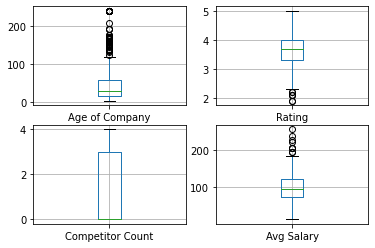

In [61]:
# 4 subplots of boxplots

fig, axes = plt.subplots(nrows=2, ncols=2) 

df.boxplot(column=['Age of Company'], ax=axes[0,0])
df.boxplot(column=['Rating'], ax=axes[0,1])
df.boxplot(column=['Competitor Count'], ax=axes[1,0])
df.boxplot(column=['Avg Salary'], ax=axes[1,1])


plt.show()

The boxplots above reveal the following:

1. The median Average Salary is almost 100k USD, with an interquartile range from around 75k USD to 125k USD. Our upper fence is around a whopping 180k USD, but the box plot reveals that there are quite a bit of outliers beyond that value, almost reaching to 300k USD. That's good news for us future data scientists!

2. The Competitor Count column does not have outliers, all of the values appear to be between 0 to 4 competitors, with a tendency to have less than more competitors.

3. The interquartile range of Ratings is from around 3.25 to 4 stars. There are a few outlier values of ratings, outliers below the lower fence of around 2.4 stars. 

4. The interquartile range of Age of Company seems to be at around 10 to 50 years old, yet the boxplot reveals that there are many outliers above the upper fence value of around 110 years old; some are even older than 200 years old!

With this new knowledge on our data, we decided to create yet another dataframe for comparison purposes: a dataset without the outliers in the Rating and Age of Company features, so as to see if we can more accurately predict our target.  


In [66]:
# load our original cleaned datatset

df2 =pd.read_csv('cleaned_glassdoor_dataset.csv',index_col=0)

# create a variable for the rows with the outliers

numerical_columns = ['Age of Company','Rating']

# create variables for our quantile range (we picked these values so as to not to remove too many rows from our dataframe)

Q1 = df2[numerical_columns].quantile(0.15)
Q3 = df2[numerical_columns].quantile(0.85)
IQR = Q3 - Q1

# create a new dataframe without our outliers

df_filtered = df2[~((df2[numerical_columns] < (Q1 - 1.5 * IQR)) |(df2[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

And then we saved the results into a csv:

df_filtered.to_csv('no_outlier_cleaned_data.csv')

Now let's revert back to our data visualizations. 

It is vital to see the correlations between our features as well as their correlations to our target. We will begin by looking at the correlations of our numerical features.

In [70]:
df[['Avg Salary','Age of Company','Rating','Description_Length','Competitor Count']].corr()

,Avg Salary,Age of Company,Rating,Description_Length,Competitor Count
Avg Salary,1.000000,-0.000873,0.132609,0.083286,0.055996
Age of Company,-0.000873,1.000000,-0.100111,0.136811,0.122526
Rating,0.132609,-0.100111,1.000000,-0.056818,-0.038808
Description_Length,0.083286,0.136811,-0.056818,1.000000,0.123123
Competitor Count,0.055996,0.122526,-0.038808,0.123123,1.000000


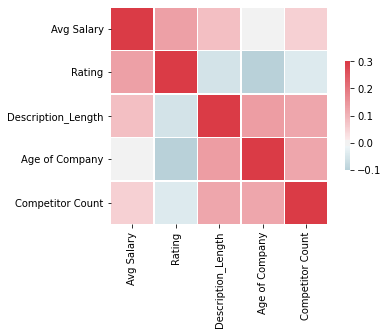

In [69]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Avg Salary','Rating','Description_Length', 'Age of Company','Competitor Count']].corr(), vmax =0.3, center =0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink":.5})

Let's note some interesting points:

1. Average Salary has the strongest correlation with Rating, and it is a positive correlation (0.13). Description Length and Competitor Count also have a positive correlation to Average Salary, albeit a weaker one. Age of Company has very weak negative correlation with Average Salary. 

2. Rating has a negative correlation with all of the other features, the strongest one being Age of Company. 

3. Age of Company has a positive correlation with both Description Length and Competitor Count. 

4. Description Length has a positive correlation with Competitor Count

What are the implications of these notes?

Older companies tend to have longer descriptions for job postings, and they have gathered more competitors over the years than younger companies. Due to the correlation of competitors and description length of job postings, it may be that the elaborate job descriptions are used to set apart a company from its competitors. However, while an older company may try to appeal using its job description, or perhaps to demand more from employees, they tend to have a lower rating and in turn a lower salary.

However, job companies with longer descriptions and more competitors do tend to pay more, perhaps because the longer descriptions are more demanding, or perhaps to set them apart from their competition.

Next, let's visualize our categorical data